The NFL is one of the biggest sports leagues in North America, and alot of the success rides on the coattails of the star position for each team known as the quarterback. The quarterback typically is the leader of the offense and is in charge of distributing the ball to lead the offense down the field and score points. Because American Football is a pretty brutal sport, injury is common, which is a detriment to the league (especially is star quarterbacks get hurt). Because of this, the league would be incentivized to protect their players from injury and this has been the case, as even over the course of my life there have been lots of rule changes and the addition of penalties. This made me curious if this would lead to a trend of higher productivity from offenses as defenses would have to be a little more judicious with their tackles.

So with that in mind, I grabbed a dataset from kaggle which charts Quarterback stats in each game from the 1996 season through the 2016 season. during this time the league became a lot more aware of injury (particularly head related injuries such as concussions). The idea that I had is to average out productivity per season and chart it out (using the yards column). below is my work to visualize how productivity (yards per game) has increased over the course of the 20 years between 1996 and 2016.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('QBStats_all.csv')

In [2]:
print(df.shape)
df.head()

(13188, 14)


,qb,att,cmp,yds,ypa,td,int,lg,sack,loss,rate,game_points,home_away,year
0,Boomer EsiasonB. Esiason,38,25,237.0,6.2,0,0,20,2.0,11.0,82.9,13,away,1996
1,Jim HarbaughJ. Harbaugh,25,16,196.0,7.8,2,1,35t,0.0,0.0,98.1,20,home,1996
2,Paul JustinP. Justin,8,5,53.0,6.6,0,0,30,1.0,11.0,81.8,20,home,1996
3,Jeff GeorgeJ. George,35,16,215.0,6.1,0,0,55,7.0,53.0,65.8,6,away,1996
4,Kerry CollinsK. Collins,31,17,198.0,6.4,2,0,30,4.0,12.0,95.9,29,home,1996


<i>Side Note - This cell is just a quick couple lines of code to clean the data to make the visualization easier to work with</i>

In [3]:
df = df.loc[~df['lg'].isna()]
df['int'] = pd.to_numeric(df['int'])
df = df.drop('lg', 1)
print(df.shape)

(13171, 13)


<i>Side Note - This cell is used to remove outliers from the data, that way we can reliably utilize each statistics mean and thus better see the upward trend over the 20 years</i>

In [4]:
col_num = ['att', 'cmp', 'yds', 'ypa', 'td', 'int', 'sack', 'loss', 'rate', 'game_points', 'year']
z_scores = stats.zscore(df.loc[:,col_num])
abs_zscore = np.abs(z_scores)
filtered_entries = (abs_zscore < 3).all(axis=1)
df = df[filtered_entries]

<i>Side Note - This cell is taking our desired data and converting it into all of the aggregate data grouping it off by year.</i>

In [5]:
avg_pts = []
avg_yds = []

for year in df['year'].unique():
    avg_pts.append(df.loc[df['year'] == year, ['game_points']].mean())
    avg_yds.append(df.loc[df['year'] == year, ['yds']].mean())  

d = {'year': df['year'].unique(), 'avg_yds': avg_yds, 'avg_pts': avg_pts}
small_df = pd.DataFrame(data=d)

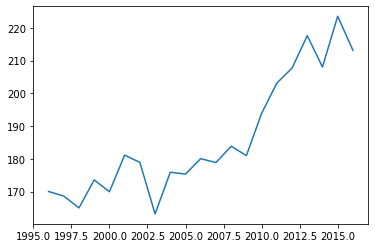

In [6]:
plt.plot(small_df['year'],small_df['avg_yds'])

here is our visualization! as we can see, there was a massive spike in productivity from roughly 2008 to 2012 and this productivity has increased even since 2016. This is amazing for the league! Not only do their players stay protected, but the increase in productivity also makes the league more dynamic and entertaining to watch. The decisions to implement safety measures and penalties was a great business move by the NFL!